# Data analysis with Jupyter Notebook, Pandas and Plotly
## A workshop by PyLadiesBcn for PyDay 2018
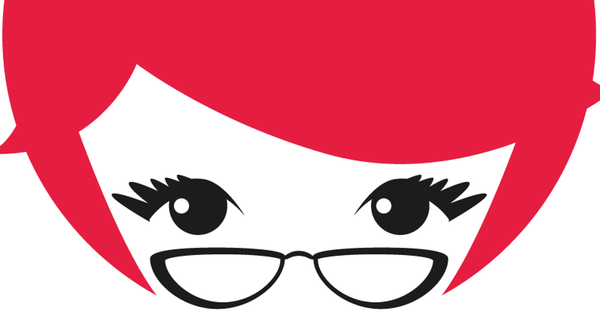

# 3. More about Pandas

In [2]:
import pandas as pd
import numpy as np


df = pd.read_csv("tarjetas.csv")

### Duplicates

Extract people who spend money in a casino and which casino they were

In [3]:
df_casinos = df[df.actividad=='CASINO'][['nombre', 'actividad_completa']]

In [4]:
df_casinos.head()

,nombre,actividad_completa
3354,Antonio Cámara Eguinoa,CAESAR'S HOTEL AND CASINO
3633,Antonio Cámara Eguinoa,CASINOS
4884,Antonio Cámara Eguinoa,CASINOS
5081,Antonio Cámara Eguinoa,CASINOS
5082,Antonio Cámara Eguinoa,CASINOS


Let's remove the duplications

In [5]:
df_casinos = df_casinos.drop_duplicates()

In [6]:
df_casinos

,nombre,actividad_completa
3354,Antonio Cámara Eguinoa,CAESAR'S HOTEL AND CASINO
3633,Antonio Cámara Eguinoa,CASINOS
12448,Rafael Eduardo Torres Posada,APUESTAS
19593,Gonzalo Martín Pascual,GAME GROUP
23886,Javier de Miguel Sánchez,GAME GROUP
35068,José Ricardo Martínez Castro,GAME GROUP
42105,Miguel Ángel Araujo Serrano,CASINO DE MADRID
43936,Miguel Ángel Araujo Serrano,GAME GROUP
45385,Pablo Abejas Juárez,CASINOS
51579,Ricardo Romero de Tejada y Picatoste,APUESTAS


### Drop NA

Pandas have special attributes called isnull() and notnull()

In [7]:
df[df.comercio.isnull()]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
30070,José Manuel Fernández Norniella,2011-12-27,15,53,22.959999,NaN,INSTRUMENTOS MUSICALES,COMPRA BIENES
30071,José Manuel Fernández Norniella,2011-12-27,15,53,19.980000,NaN,INSTRUMENTOS MUSICALES,COMPRA BIENES
30072,José Manuel Fernández Norniella,2011-12-27,15,53,19.980000,NaN,INSTRUMENTOS MUSICALES,COMPRA BIENES
30073,José Manuel Fernández Norniella,2011-12-28,16,1,7.990000,NaN,INSTRUMENTOS MUSICALES,COMPRA BIENES
30074,José Manuel Fernández Norniella,2011-12-29,15,37,102.480003,NaN,HELADERIA,RESTAURANTE
30075,José Manuel Fernández Norniella,2012-01-05,15,36,0.790000,NaN,DIRECT MARKETING CONTINUITY/SUBCRIPCION,DIRECT MARKETING
30076,José Manuel Fernández Norniella,2012-01-13,16,1,88.470001,NaN,MISCELLANEOUS APPAREL &amp; ACCESSORY STORES,COMPRA BIENES
30077,José Manuel Fernández Norniella,2012-01-13,16,1,88.470001,NaN,MISCELLANEOUS APPAREL &amp; ACCESSORY STORES,COMPRA BIENES
30078,José Manuel Fernández Norniella,2012-01-13,16,1,88.470001,NaN,MISCELLANEOUS APPAREL &amp; ACCESSORY STORES,COMPRA BIENES
46845,Pablo Abejas Juárez,2011-12-29,15,37,0.990000,NaN,INSTRUMENTOS MUSICALES,COMPRA BIENES


But you can also get rid of it quickly with dropna

In [8]:
len(df)

77202

In [9]:
df_drop_na_comercio = df.dropna(subset=['comercio'])

In [10]:
len(df_drop_na_comercio)

77191

### Unique values

In [11]:
df[df.actividad=='CASINO'].nombre.unique()

array(['Antonio Cámara Eguinoa', 'Rafael Eduardo Torres Posada',
       'Gonzalo Martín Pascual', 'Javier de Miguel Sánchez',
       'José Ricardo Martínez Castro', 'Miguel Ángel Araujo Serrano',
       'Pablo Abejas Juárez', 'Ricardo Romero de Tejada y Picatoste',
       'Maria Mercedes de la Merced Monge',
       'Ildefonso José Sánchez Barcoj', 'Matías Amat Roca',
       'Luis Gabarda Durán', 'Rodrigo de Rato Figaredo'], dtype=object)

### String operations

In [12]:
df.head()

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,CONFECCION TEXTIL EN GENERAL,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"HOTELES,MOTELES,BALNEARIOS,CAMPINGS REST",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,RESTAURANTES RESTO,RESTAURANTE
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,GASOLINERAS,COCHE
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,GASOLINERAS,COCHE


In [13]:
df['actividad_completa'] = df.actividad_completa.str.lower()

In [14]:
df.head()

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,confeccion textil en general,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"hoteles,moteles,balnearios,campings rest",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,restaurantes resto,RESTAURANTE
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,gasolineras,COCHE
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,gasolineras,COCHE


### Numerical operations

In [15]:
df[df.actividad=='CASINO'].importe.mean()

136.06657465516707

In [16]:
%matplotlib inline

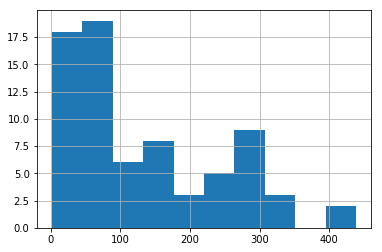

In [17]:
df[df.actividad=='CASINO'].importe.hist()

### Groupby

How many activities each person spent money with?

In [18]:
df.groupby('nombre').actividad.count()

nombre
Alberto Recarte García Andrade            1357
Alejandro Couceiro Ojeda                   549
Angel Rizaldos González                    120
Antonio Cámara Eguinoa                    3358
Antonio Rey de Viñas Sánchez-Majestad     1822
Antonio Romero Lázaro                     2103
Arturo Luis Fernández Álvarez              134
Beltrán Gutiérrez Moliner                  425
Carlos María Martínez Martínez            1197
Carlos Vela García                         803
Carmen Contreras Gómez                    1061
Cándido Cerón Escudero                     578
Domingo Navalmoral Sánchez                 137
Enrique de la Torre Martínez               385
Estanislao Rodríguez-Ponga Salamanca      1414
Fernando Serrano Antón                     637
Francisco Baquero Noriega                 1100
Francisco Javier López Madrid              111
Francisco José Moure Bourio                894
Francisco José Pérez Fernández            1195
Gabriel María Moreno Flores                318
Gerard

In [19]:
df.groupby(['nombre','actividad']).actividad.count()

nombre                                  actividad         
Alberto Recarte García Andrade          AVION                  60
                                        BANCO                   1
                                        BUSINESS                1
                                        COCHE                 367
                                        COMPRA BIENES         114
                                        DEPORTE                20
                                        DIRECT MARKETING       15
                                        DUTYFREE                1
                                        HOGAR                   1
                                        HOTEL                 189
                                        LIBRERIA               65
                                        MISC                   27
                                        REGALOS                 1
                                        RESTAURANTE           436
                 

In [20]:
df[(df.nombre=='Alberto Recarte García Andrade') & (df.actividad=='SUPERMERCADO')]

,nombre,fecha,hora,minuto,importe,comercio,actividad_completa,actividad
152,Alberto Recarte García Andrade,2003-12-09,9,51,759.919983,NEW PALACIO DE LOS LICORES,"supermercados,ultramarinos, economatos",SUPERMERCADO
352,Alberto Recarte García Andrade,2005-06-19,19,42,11.400000,EMBASSY S A,"supermercados,ultramarinos, economatos",SUPERMERCADO
529,Alberto Recarte García Andrade,2006-10-10,16,46,88.610001,SEMON,"supermercados,ultramarinos, economatos",SUPERMERCADO
560,Alberto Recarte García Andrade,2006-12-24,13,10,217.380005,PASTELERIAS MALLORCA (KE),"supermercados,ultramarinos, economatos",SUPERMERCADO
577,Alberto Recarte García Andrade,2007-01-20,18,25,31.250000,PASTELERIAS MALLORCA (KE),"supermercados,ultramarinos, economatos",SUPERMERCADO
804,Alberto Recarte García Andrade,2007-12-24,19,52,259.019989,PASTELERIAS MALLORCA (KE),hipermercados (tecnologia electronica),SUPERMERCADO
1078,Alberto Recarte García Andrade,2009-01-11,22,45,63.270000,MALLORCA,hipermercados (tecnologia electronica),SUPERMERCADO


Let's do a new DataFrame with a summary of information:

In [21]:
df_summary = pd.DataFrame(df.groupby('nombre').actividad.count())

In [22]:
df_summary.head()

,actividad
nombre,
Alberto Recarte García Andrade,1357
Alejandro Couceiro Ojeda,549
Angel Rizaldos González,120
Antonio Cámara Eguinoa,3358
Antonio Rey de Viñas Sánchez-Majestad,1822


In [23]:
df_summary['importe_media'] = df.groupby('nombre').importe.mean()
df_summary['importe_max'] = df.groupby('nombre').importe.max()
df_summary['importe_min'] = df.groupby('nombre').importe.min()
df_summary['importe_total'] = df.groupby('nombre').importe.sum()

In [24]:
df_summary.head()

,actividad,importe_media,importe_max,importe_min,importe_total
nombre,,,,,
Alberto Recarte García Andrade,1357,100.592498,3509.199951,-401.250000,136504.019797
Alejandro Couceiro Ojeda,549,124.762277,1150.000000,-100.800003,68494.490011
Angel Rizaldos González,120,168.135918,843.000000,24.450001,20176.310112
Antonio Cámara Eguinoa,3358,52.461551,2742.000000,-328.420013,176165.889852
Antonio Rey de Viñas Sánchez-Majestad,1822,103.598222,1751.079956,-241.490005,188755.959932


### reset_index()

For DataFrame with multi-level index, return new DataFrame with labeling information in the columns under the index names, defaulting to ‘level_0’, ‘level_1’, etc. if any are None. For a standard index, the index name will be used (if set), otherwise a default ‘index’ or ‘level_0’ (if ‘index’ is already taken) will be used.

In [25]:
df_summary = df_summary.reset_index()

In [26]:
df_summary = df_summary.sort_values('importe_total',ascending=False)

In [27]:
df_summary.head()

,nombre,actividad,importe_media,importe_max,importe_min,importe_total
27,Ildefonso José Sánchez Barcoj,2737,208.598979,16921.759766,-9784.730469,572187.000182
34,José Antonio Moral Santín,1215,368.534757,1000.000000,1.200000,447769.729996
75,Ricardo Morado Iglesias,265,1675.468641,6800.000000,-304.000000,443999.189930
58,Matías Amat Roca,1036,414.355366,15000.000000,-7287.740234,429272.159650
60,Miguel Blesa de la Parra,1565,270.331303,13148.299805,-2000.000000,423068.489459


Ok... wow... how much did they spent??

## Exercises

1. Which casinos were used?

2. Which person spent more money in total? How much was it?

3. In which activity he spent the maximum import? Which was this import?

4. Which was the annual median of money spent per person?

## Setting data

### Rename a column

In [28]:
df.rename(columns={'actividad_completa':'actividad_detalles'},inplace=True)

In [29]:
df.head()

,nombre,fecha,hora,minuto,importe,comercio,actividad_detalles,actividad
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,confeccion textil en general,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"hoteles,moteles,balnearios,campings rest",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,restaurantes resto,RESTAURANTE
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,gasolineras,COCHE
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,gasolineras,COCHE


Copy the dataframe and change the name of all columns

In [30]:
df_english = df.copy()

In [31]:
df_english.columns = ['name','date','hour','minute','import','business','activity_full','activity']

In [32]:
df_english.head()

,name,date,hour,minute,import,business,activity_full,activity
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,confeccion textil en general,ROPA
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"hoteles,moteles,balnearios,campings rest",HOTEL
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,restaurantes resto,RESTAURANTE
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,gasolineras,COCHE
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,gasolineras,COCHE


### Operate over columns

Let's convert the import from euros to dolars with the rate conversion 1€ = 1.14$

In [33]:
df["importe_dolar"] = df["importe"]*1.14

In [34]:
df.head()

,nombre,fecha,hora,minuto,importe,comercio,actividad_detalles,actividad,importe_dolar
0,Alberto Recarte García Andrade,2003-01-04,12,30,38.700001,RCG OFICINA,confeccion textil en general,ROPA,44.118001
1,Alberto Recarte García Andrade,2003-01-04,12,32,14.600000,MANZANIL AREA,"hoteles,moteles,balnearios,campings rest",HOTEL,16.644000
2,Alberto Recarte García Andrade,2003-01-05,19,7,95.620003,REST REAL C GOLF SOTOGRAN,restaurantes resto,RESTAURANTE,109.006803
3,Alberto Recarte García Andrade,2003-01-08,15,31,49.130001,ESTACONES DE SERVICIO ML,gasolineras,COCHE,56.008201
4,Alberto Recarte García Andrade,2003-01-08,16,5,13.940000,NISA (H 24) VINHOLAN S.A.,gasolineras,COCHE,15.891600


In [35]:
total_money = df_summary.importe_total.sum()

In [36]:
df_summary["porcentaje"] = (df_summary.importe_total / total_money)*100

In [37]:
df_summary.head()

,nombre,actividad,importe_media,importe_max,importe_min,importe_total,porcentaje
27,Ildefonso José Sánchez Barcoj,2737,208.598979,16921.759766,-9784.730469,572187.000182,4.846261
34,José Antonio Moral Santín,1215,368.534757,1000.000000,1.200000,447769.729996,3.792482
75,Ricardo Morado Iglesias,265,1675.468641,6800.000000,-304.000000,443999.189930,3.760547
58,Matías Amat Roca,1036,414.355366,15000.000000,-7287.740234,429272.159650,3.635813
60,Miguel Blesa de la Parra,1565,270.331303,13148.299805,-2000.000000,423068.489459,3.583270


### Operate over specific rows

In [38]:
df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))].actividad_detalles[:5]

66      direct marketing-combination catalog&amp;ret
212     direct marketing-combination catalog&amp;ret
213     direct marketing-combination catalog&amp;ret
1923              men's &amp; ladies clothing stores
2365    antique shops-sales, repairs &amp; restorati
Name: actividad_detalles, dtype: object

In [39]:
df.loc[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;')), 'actividad_detalles'] = df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))].actividad_detalles.str.replace('&amp;','&')

In [40]:
df[(df.actividad_detalles.notnull())&(df.actividad_detalles.str.contains('&amp;'))]

,nombre,fecha,hora,minuto,importe,comercio,actividad_detalles,actividad,importe_dolar


### Apply

In [41]:
def discretize_import(importe):
    importe = abs(importe)
    if importe <= 10:
        return 'LOW'
    elif 10 < importe <= 100:
        return 'MEDIUM'
    elif 100 <= importe < 1000:
        return 'HIGH'
    else:
        return 'SUPER-HIGH'

In [42]:
df['importe_discretizado'] = df.importe.apply(lambda x: discretize_import(x))

## Exercises

1. Check if what the press said is true

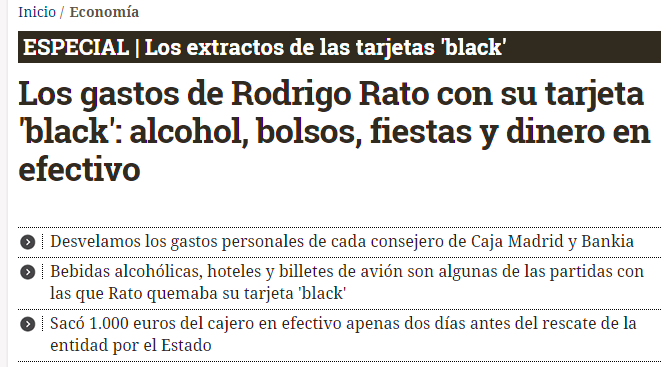

2. Do you believe the quote from this [newspaper article](https://www.europapress.es/nacional/noticia-gastos-rato-blesa-tarjetas-vistazo-20141010175452.html)? 

"Los apuntes incluidos en la documentación incluyen gastos como varios miles de euros en vino en el establecimiento Lavinia España Selección, durante la Navidad y otras ocasiones, de Miguel Blesa; o 1.849,23 euros en 'clubs, salas de fiestas, pubs, discotecas y bares' cuatro días seguidos, de Rodrigo Rato."  

3. Who spent money on McDonald's?

## Join

### Concat

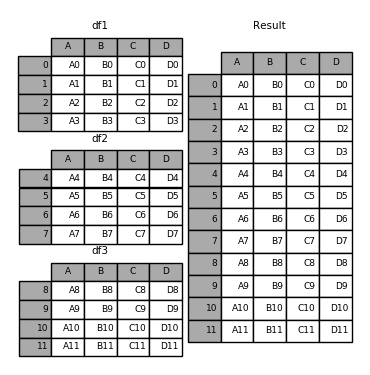

In [43]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                   'B': ['B8', 'B9', 'B10', 'B11'],
                   'C': ['C8', 'C9', 'C10', 'C11'],
                   'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [44]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [45]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [46]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [47]:
pd.concat([df1, df2, df3])

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [48]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])

In [49]:
pd.concat([df1, df4], axis=1, sort=False)

TypeError: concat() got an unexpected keyword argument 'sort'

In [ ]:
pd.concat([df1, df4], axis=1, join='inner')

### Merge

```python
pd.merge(left, right, 
        how='inner', 
        on=None, 
        left_on=None, 
        right_on=None,
        left_index=False, 
        right_index=False```

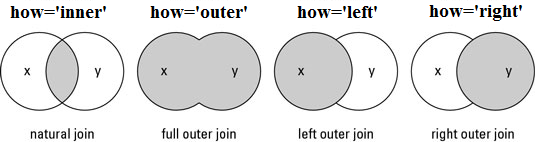

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [ ]:
pd.merge(left, right, on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='left', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='right', on=['key1', 'key2'])

In [ ]:
pd.merge(left, right, how='outer', on=['key1', 'key2'])

## Exercises

We have download the 'cargos_targetas_black.xlsx dataset from el [periodico](https://www.elperiodico.com/es/graficos/economia/imputados-tarjetas-black-caja-madrid-8550/). Please add it to the main dataframe and calculate how many money was spent by members or the same political party / labour union?